<a href="https://colab.research.google.com/github/sudipbasu/drone_control/blob/main/Drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drone Security Monitoring and Geofencing Simulation using Python

Simulation of Single Drone


--- Step 1 ---


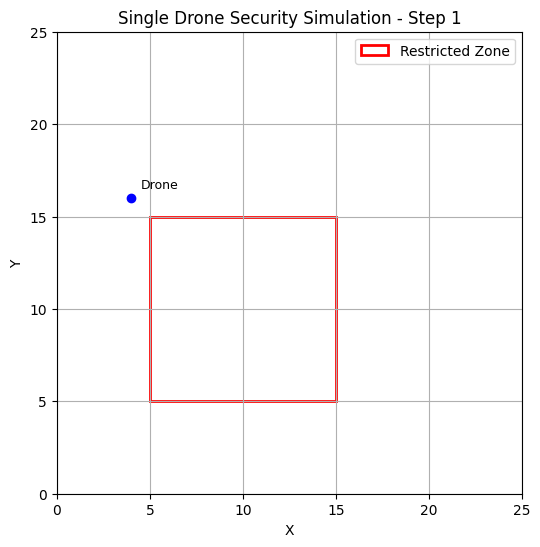


--- Step 2 ---


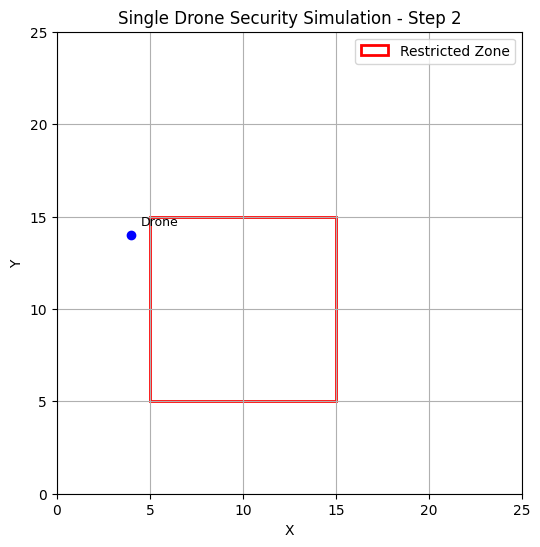


--- Step 3 ---


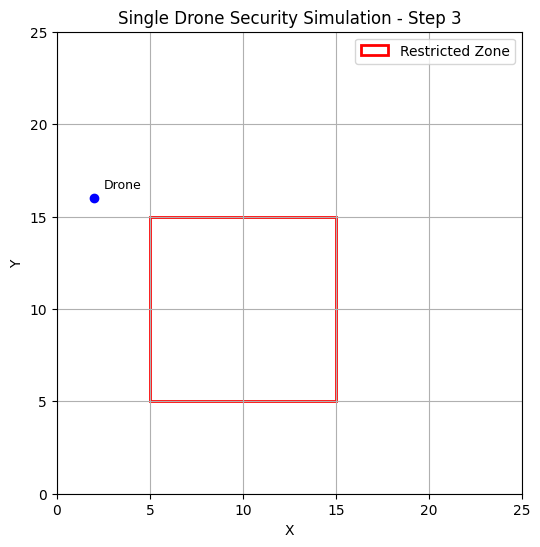


--- Step 4 ---


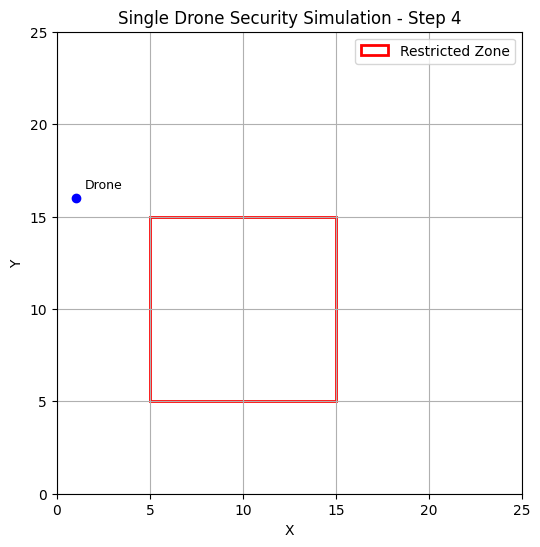


--- Step 5 ---


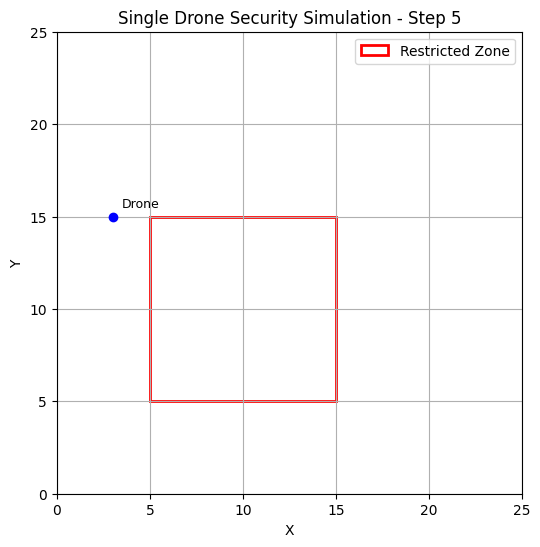


--- Step 6 ---


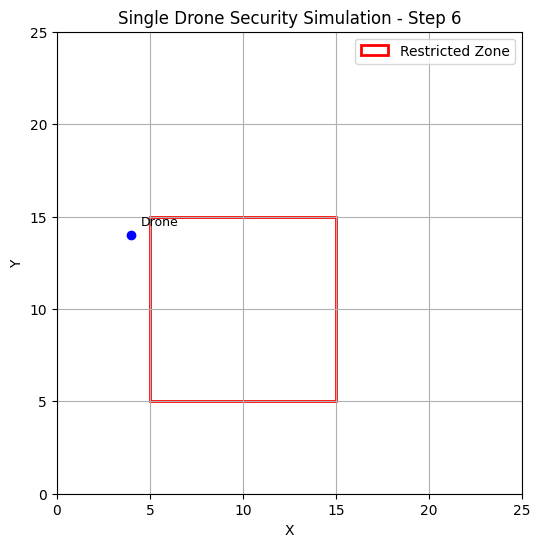


--- Step 7 ---


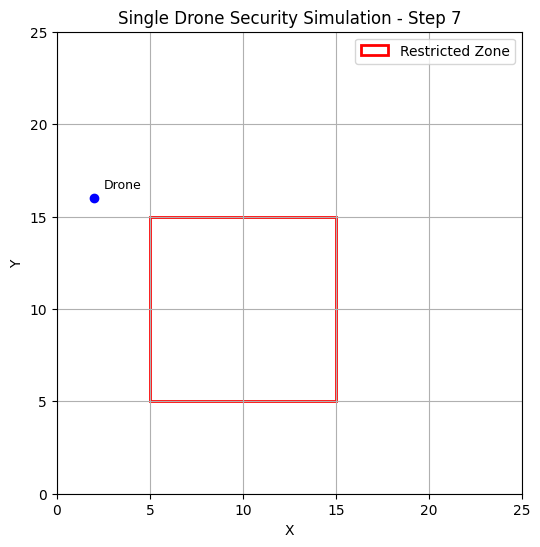


--- Step 8 ---


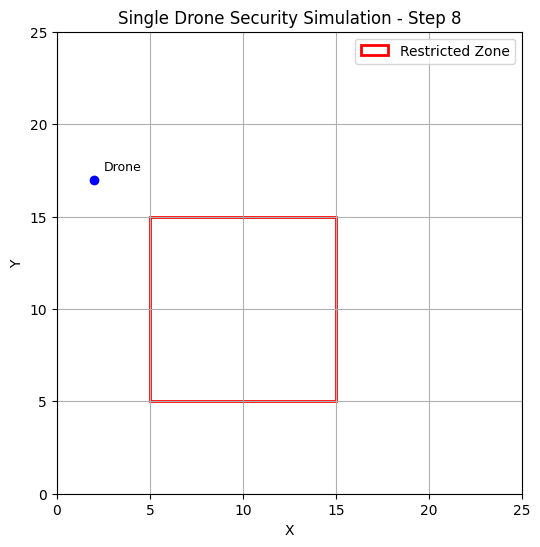


--- Step 9 ---


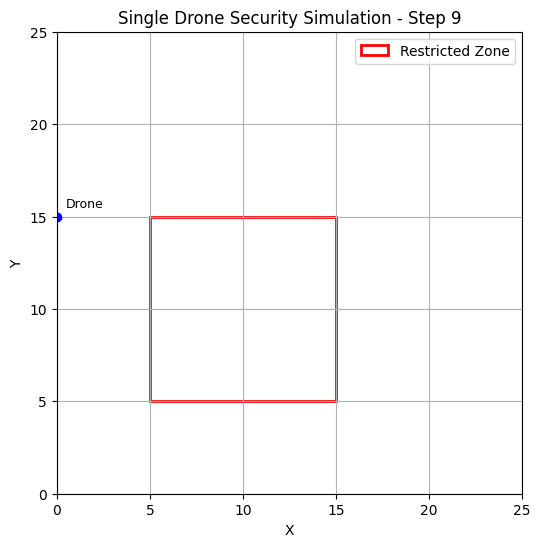


--- Step 10 ---


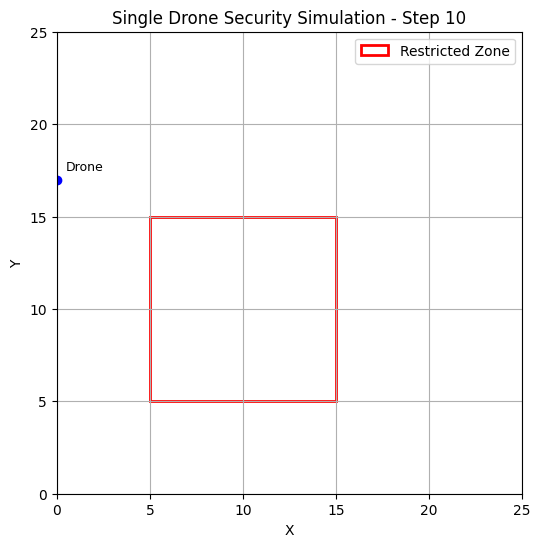


--- Step 11 ---


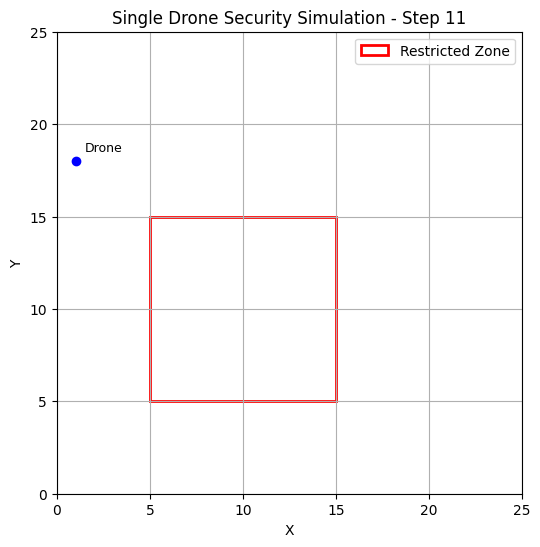


--- Step 12 ---


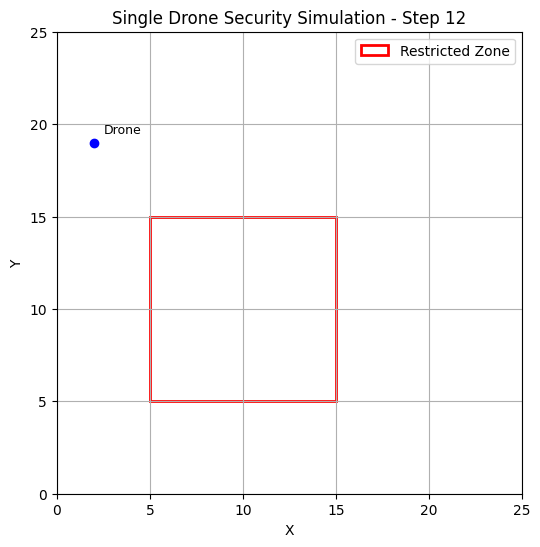


--- Step 13 ---


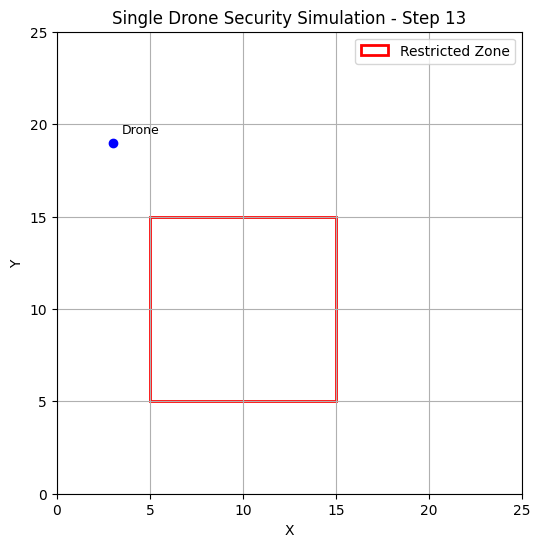


--- Step 14 ---


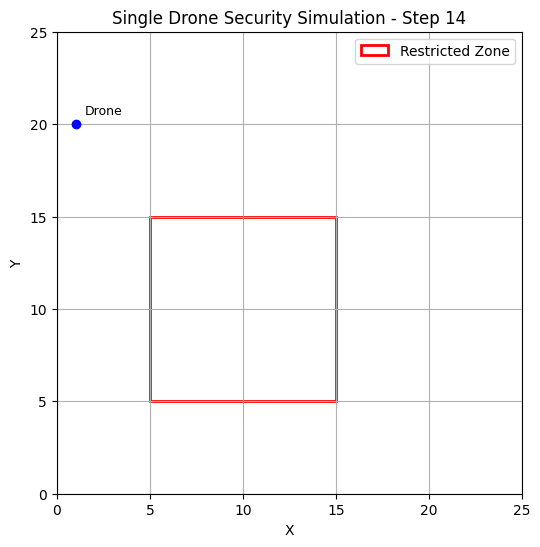


--- Step 15 ---


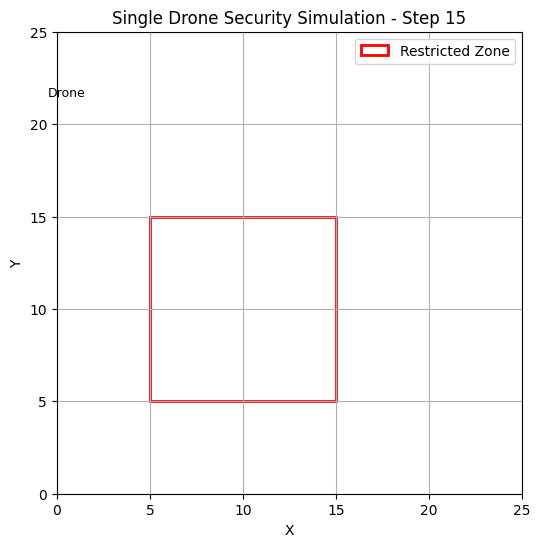


--- Step 16 ---


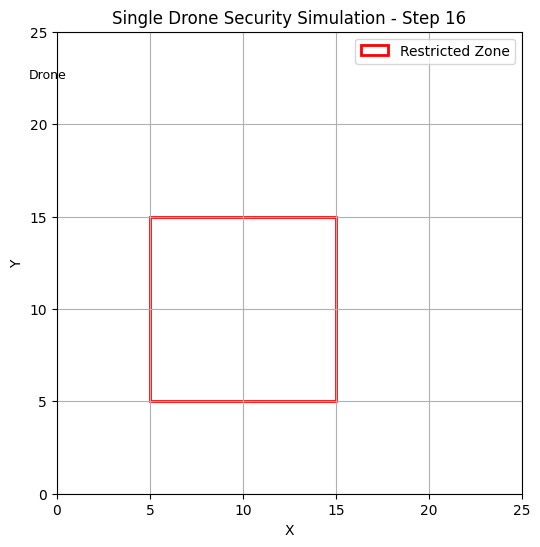


--- Step 17 ---


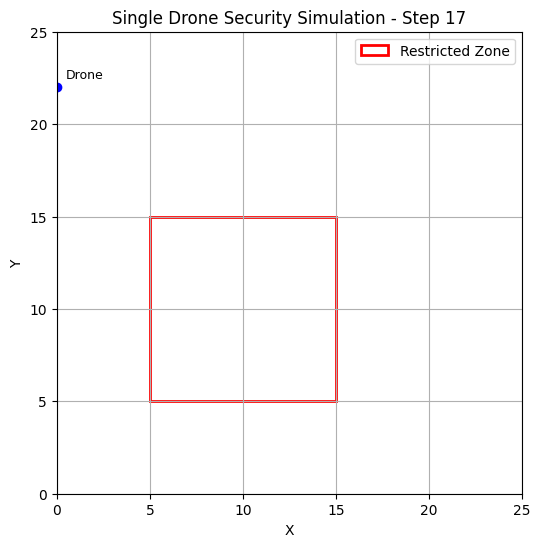


--- Step 18 ---


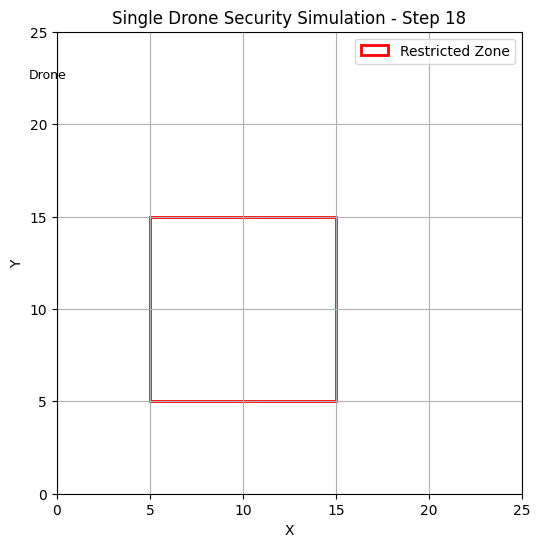


--- Step 19 ---


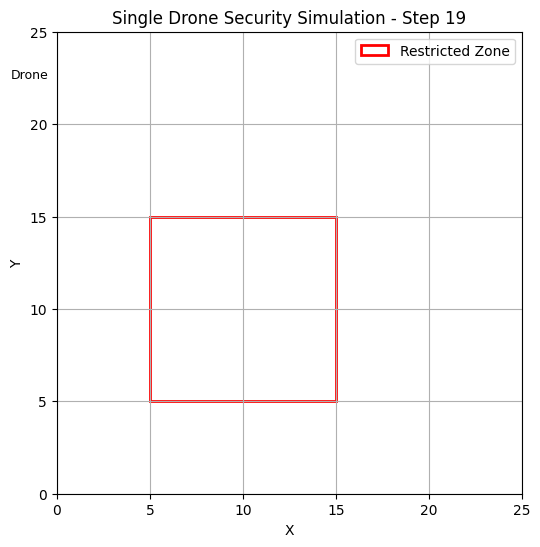


--- Step 20 ---


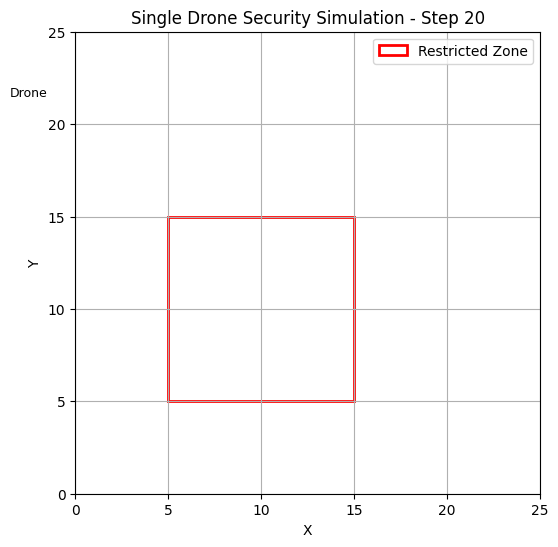

In [2]:
import matplotlib.pyplot as plt
import random

# Define the restricted zone
RESTRICTED_ZONE = {
    "x_min": 5,
    "x_max": 15,
    "y_min": 5,
    "y_max": 15
}

class Drone:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        self.in_restricted_zone = False

    def move(self):
        # Random movement
        self.x += random.randint(-2, 2)
        self.y += random.randint(-2, 2)

    def check_intrusion(self):
        if (RESTRICTED_ZONE['x_min'] <= self.x <= RESTRICTED_ZONE['x_max'] and
            RESTRICTED_ZONE['y_min'] <= self.y <= RESTRICTED_ZONE['y_max']):
            if not self.in_restricted_zone:
                print(f"ALERT: Drone has entered the restricted zone at ({self.x}, {self.y})")
                self.in_restricted_zone = True
        else:
            if self.in_restricted_zone:
                print(f"Drone has exited the restricted zone at ({self.x}, {self.y})")
                self.in_restricted_zone = False

def simulate_single_drone(steps=20):
    drone = Drone(x=random.randint(0, 20), y=random.randint(0, 20))

    for step in range(steps):
        print(f"\n--- Step {step + 1} ---")
        plt.figure(figsize=(6, 6))
        plt.xlim(0, 25)
        plt.ylim(0, 25)

        # Draw restricted zone
        plt.gca().add_patch(
            plt.Rectangle(
                (RESTRICTED_ZONE['x_min'], RESTRICTED_ZONE['y_min']),
                RESTRICTED_ZONE['x_max'] - RESTRICTED_ZONE['x_min'],
                RESTRICTED_ZONE['y_max'] - RESTRICTED_ZONE['y_min'],
                linewidth=2,
                edgecolor='r',
                facecolor='none',
                label='Restricted Zone'
            )
        )

        drone.move()
        drone.check_intrusion()

        plt.plot(drone.x, drone.y, 'bo')  # blue dot
        plt.text(drone.x + 0.5, drone.y + 0.5, f"Drone", fontsize=9)
        plt.title(f"Single Drone Security Simulation - Step {step + 1}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.legend()
        plt.show()

simulate_single_drone()

For multiple drones

Enter the number of drones to simulate: 4

--- Step 1 ---


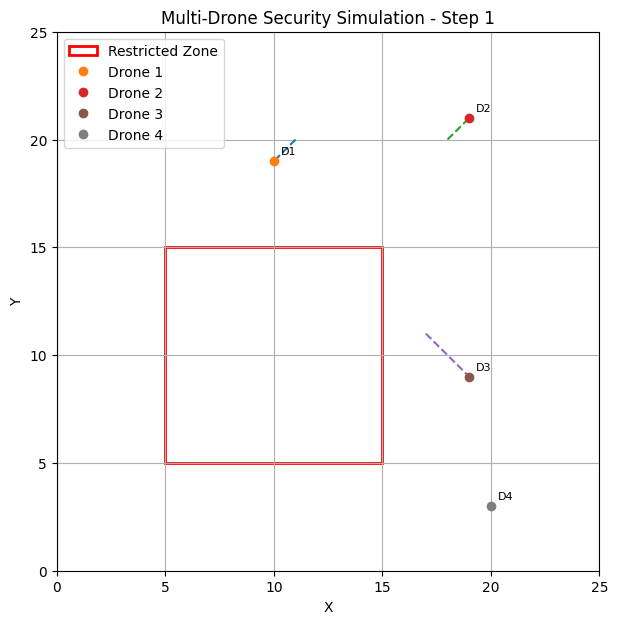


--- Step 2 ---


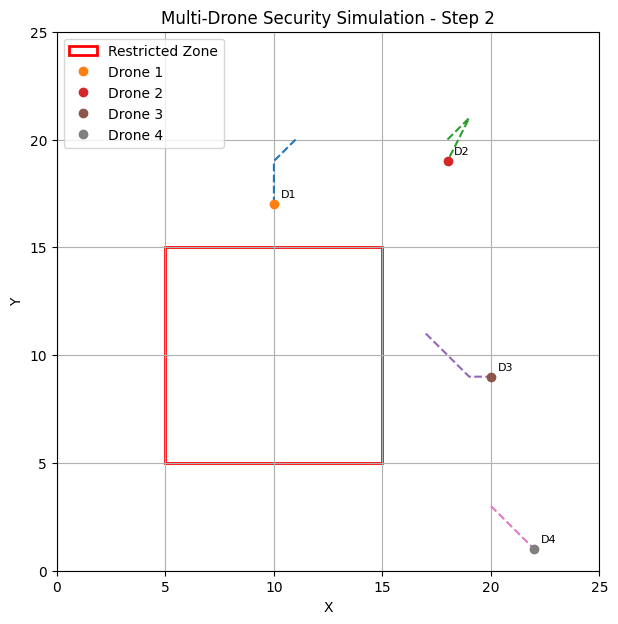


--- Step 3 ---


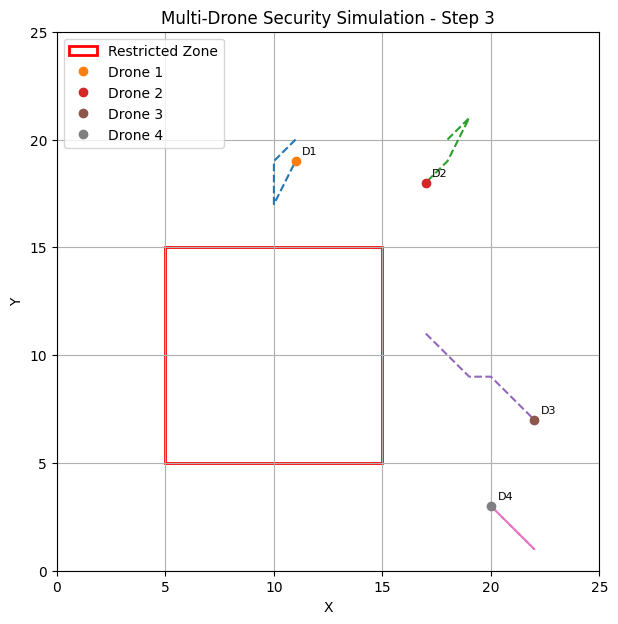


--- Step 4 ---


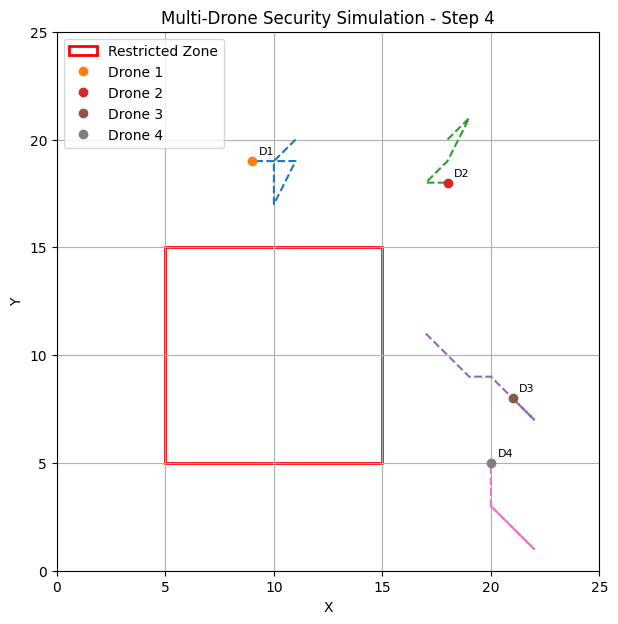


--- Step 5 ---


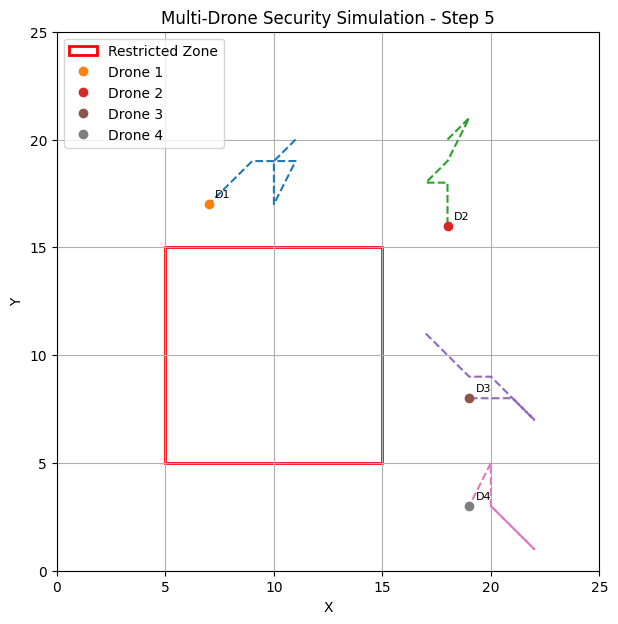


--- Step 6 ---


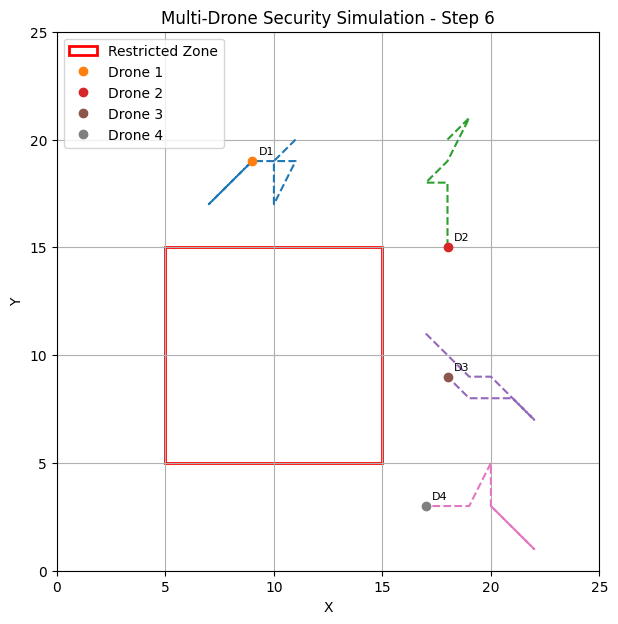


--- Step 7 ---


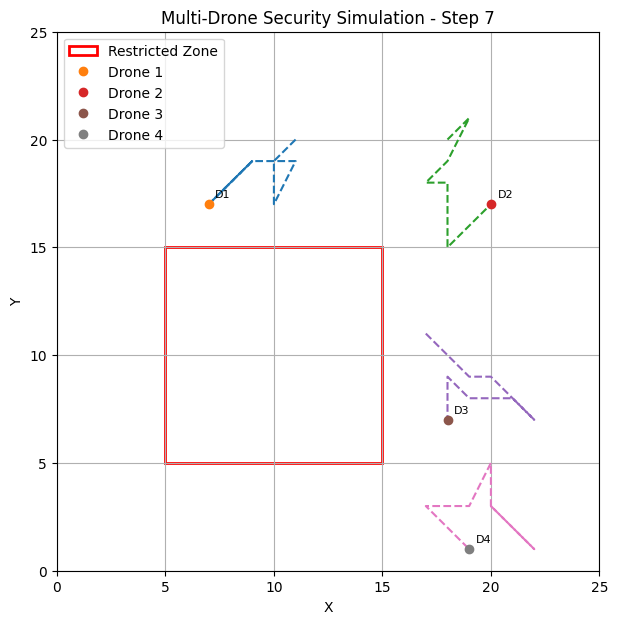


--- Step 8 ---


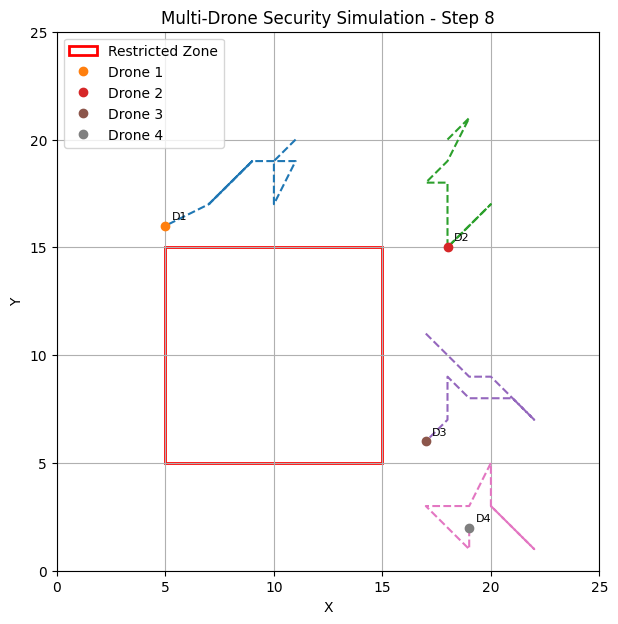


--- Step 9 ---
ALERT: Drone 1 has entered the restricted zone at (7, 15)


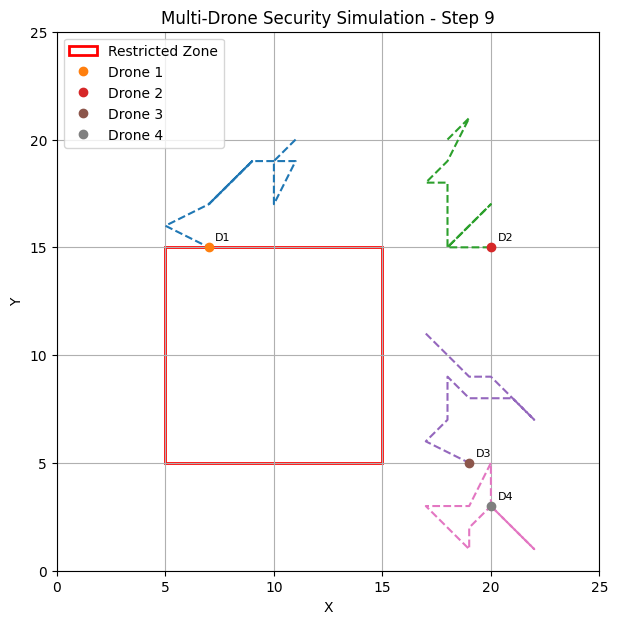


--- Step 10 ---
Drone 1 has exited the restricted zone at (8, 16)


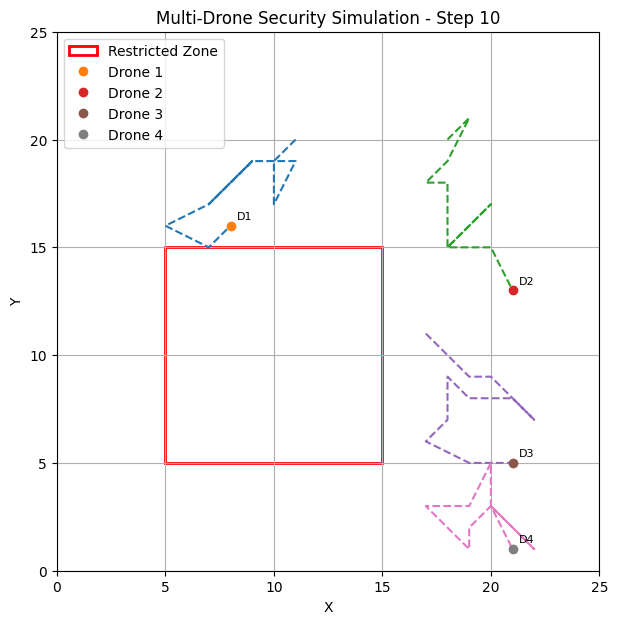


--- Step 11 ---
ALERT: Drone 1 has entered the restricted zone at (10, 14)


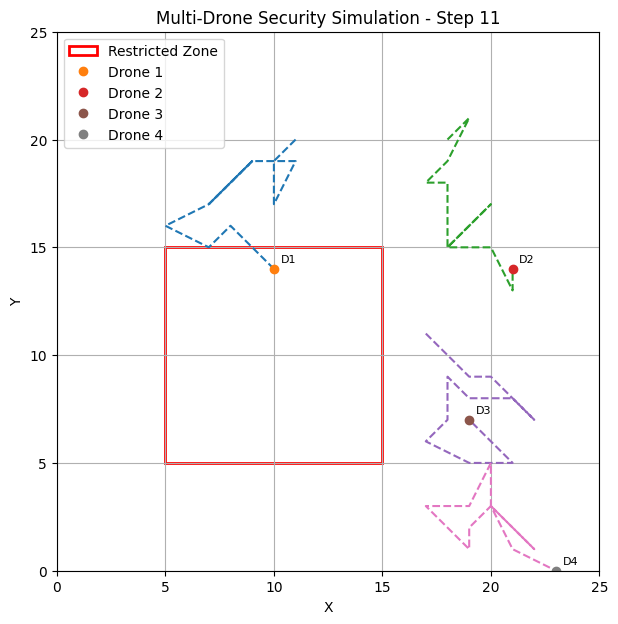


--- Step 12 ---


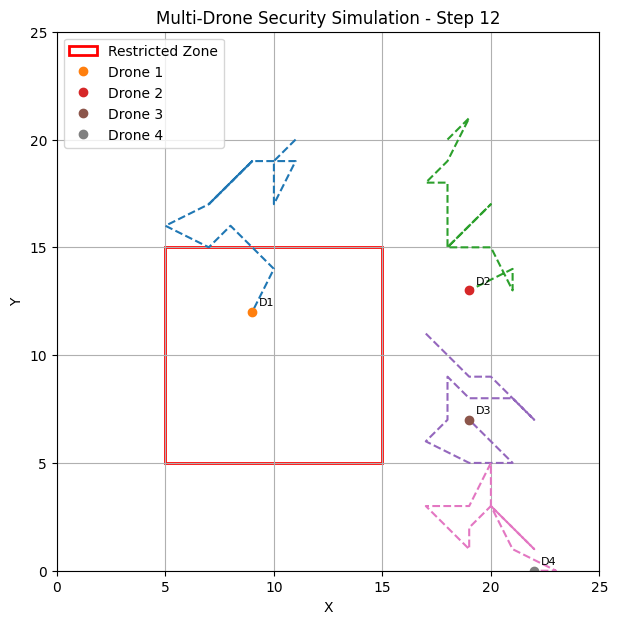


--- Step 13 ---


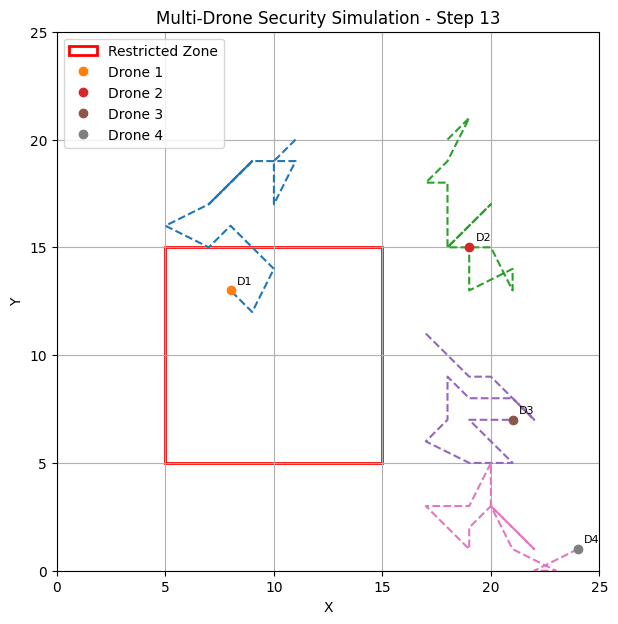


--- Step 14 ---


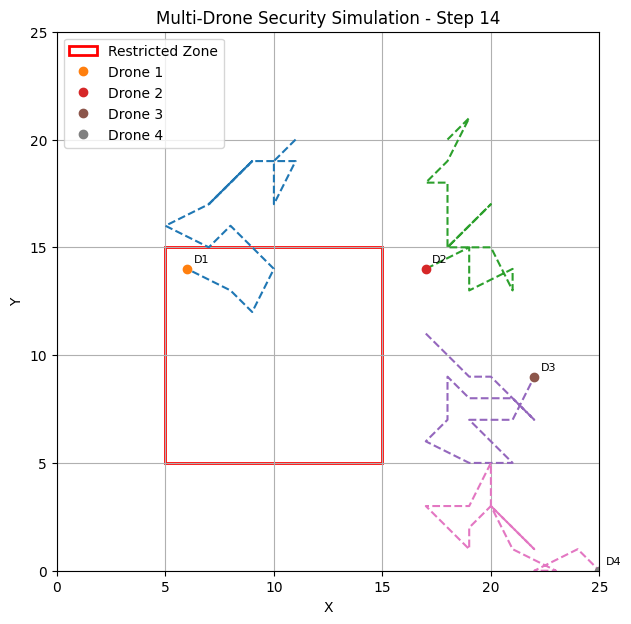


--- Step 15 ---


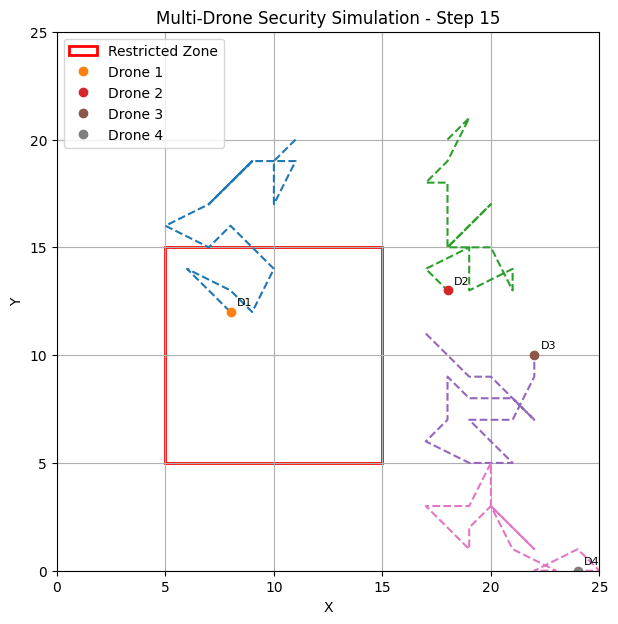


--- Step 16 ---


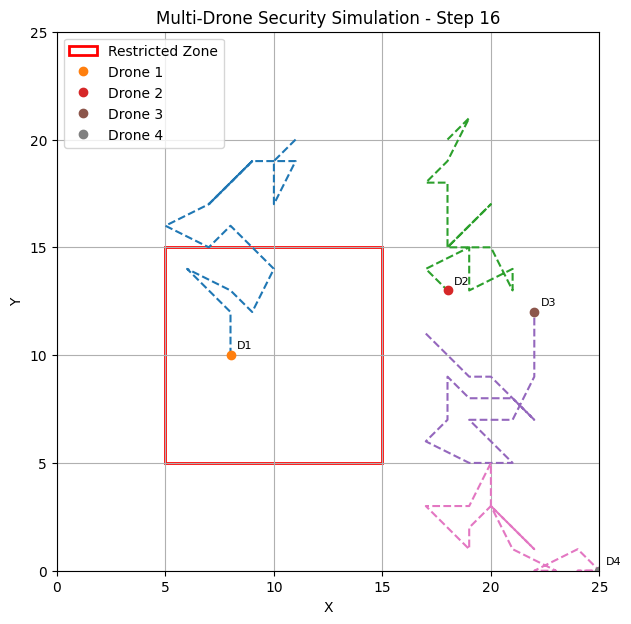


--- Step 17 ---


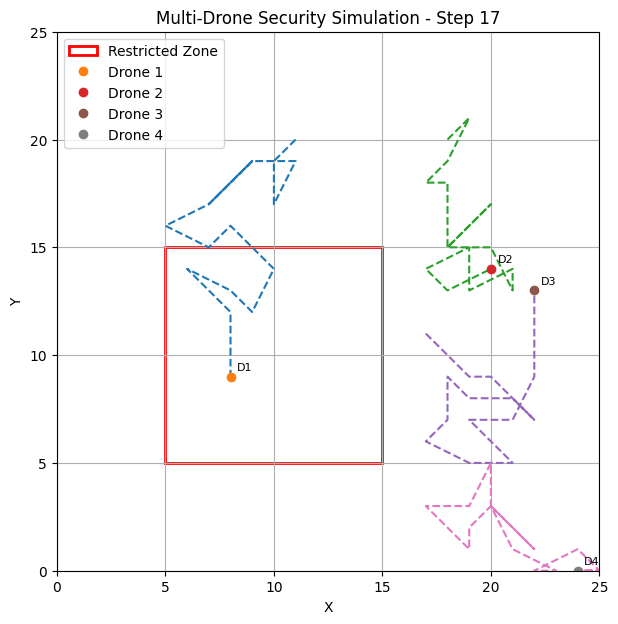


--- Step 18 ---


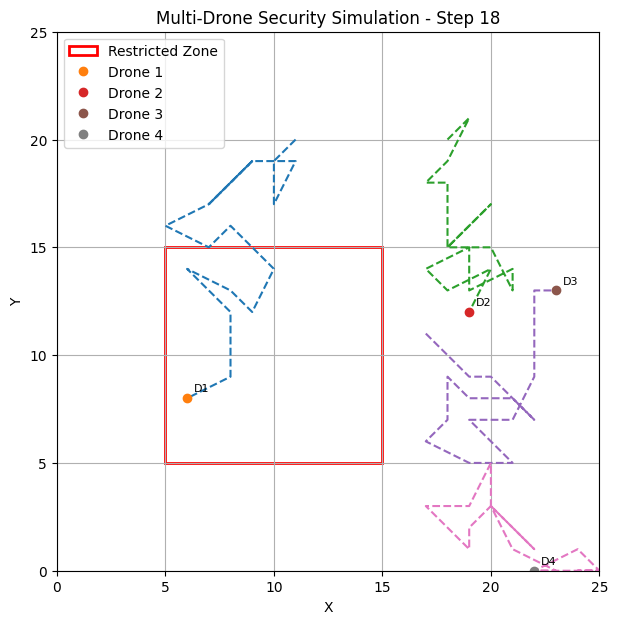


--- Step 19 ---


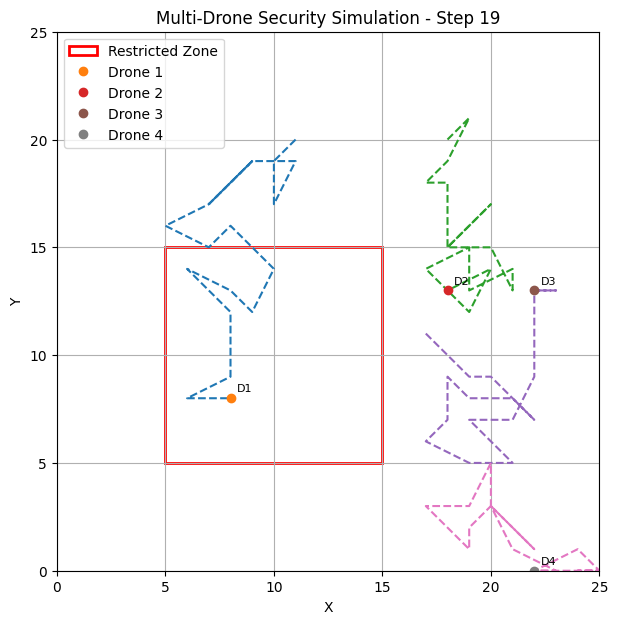


--- Step 20 ---


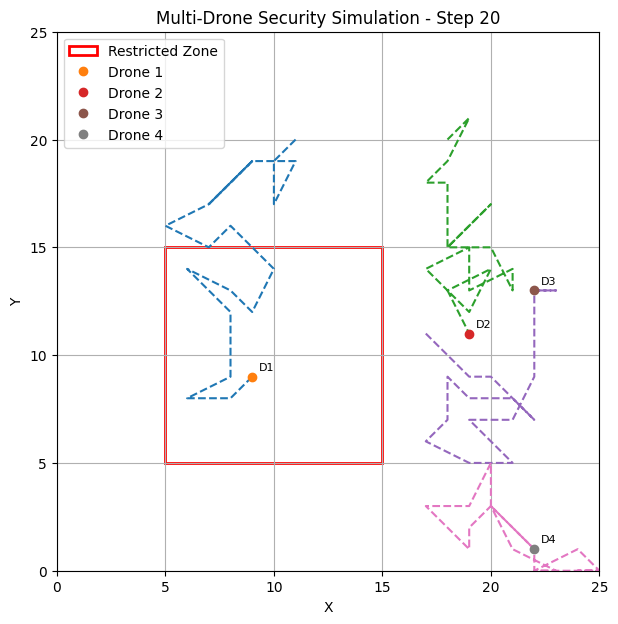

In [4]:
import matplotlib.pyplot as plt
import random

# Define the restricted zone
RESTRICTED_ZONE = {
    "x_min": 5,
    "x_max": 15,
    "y_min": 5,
    "y_max": 15
}

class Drone:
    def __init__(self, id, x=0, y=0):
        self.id = id
        self.x = x
        self.y = y
        self.in_restricted_zone = False
        self.path_x = [x]
        self.path_y = [y]

    def move(self):
        # Random movement
        self.x += random.randint(-2, 2)
        self.y += random.randint(-2, 2)

        # Clamp position to bounds (0 to 25)
        self.x = max(0, min(self.x, 25))
        self.y = max(0, min(self.y, 25))

        # Store position
        self.path_x.append(self.x)
        self.path_y.append(self.y)

    def check_intrusion(self):
        if (RESTRICTED_ZONE['x_min'] <= self.x <= RESTRICTED_ZONE['x_max'] and
            RESTRICTED_ZONE['y_min'] <= self.y <= RESTRICTED_ZONE['y_max']):
            if not self.in_restricted_zone:
                print(f"ALERT: Drone {self.id} has entered the restricted zone at ({self.x}, {self.y})")
                self.in_restricted_zone = True
        else:
            if self.in_restricted_zone:
                print(f"Drone {self.id} has exited the restricted zone at ({self.x}, {self.y})")
                self.in_restricted_zone = False

def simulate_multiple_drones(num_drones=5, steps=20):
    drones = [
        Drone(id=i+1, x=random.randint(0, 20), y=random.randint(0, 20))
        for i in range(num_drones)
    ]

    for step in range(steps):
        print(f"\n--- Step {step + 1} ---")
        plt.figure(figsize=(7, 7))
        plt.xlim(0, 25)
        plt.ylim(0, 25)

        # Draw restricted zone
        plt.gca().add_patch(
            plt.Rectangle(
                (RESTRICTED_ZONE['x_min'], RESTRICTED_ZONE['y_min']),
                RESTRICTED_ZONE['x_max'] - RESTRICTED_ZONE['x_min'],
                RESTRICTED_ZONE['y_max'] - RESTRICTED_ZONE['y_min'],
                linewidth=2,
                edgecolor='r',
                facecolor='none',
                label='Restricted Zone'
            )
        )

        for drone in drones:
            drone.move()
            drone.check_intrusion()
            plt.plot(drone.path_x, drone.path_y, linestyle='--')  # Path
            plt.plot(drone.x, drone.y, 'o', label=f"Drone {drone.id}")
            plt.text(drone.x + 0.3, drone.y + 0.3, f"D{drone.id}", fontsize=8)

        plt.title(f"Multi-Drone Security Simulation - Step {step + 1}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.legend()
        plt.show()

# User input for number of drones
if __name__ == "__main__":
    try:
        n = int(input("Enter the number of drones to simulate: "))
        simulate_multiple_drones(num_drones=n)
    except ValueError:
        print("Please enter a valid integer for the number of drones.")